# A. Introduction

### The purpose of this project is to provide a template to identify rental properties in a specific neighborhood, within the budget constraints and preference of the individual(s).


### Finding a rental property with one's preferences and constraints can be very time comsuming task, requiring a lot of effort. An individual may be looking for a rental space for different purposes, and, within different budgets like for work or educational purposes. The project can help find tailored options as per these criteria for the individuals, and, help save a lot of time and effort.


### Through this template one can not only find the affordable rental properties but also make sure to keep proximity to nearby places-of-interest in mind, to narrow down to few options  meeting the requirements.


### This project can be used by both individuals well as by real estate agents to skim through the rental properties as per the requirements.

# B. Data Description

### For this project, multiple datasets are being used to build a holistic view of the rental properties and nearby places. The datasets being used are sourced from different sources:



1. **Rental properties data:**

    **Details**: This data has the list of rental properties with additional information in the specific neighborhood 
    
    **Source**: https://www.trulia.com/rent/
    
    **Data**: Borough, neighborhood and property specific details like property address (street address), price (in USD), size (in sqft), number of bedrooms and bathrooms
<br><br>
2. **New York City data:**
    
    **Details**: This data has list of booughs and neighborhood along with the geo-coordinates 
    
    **Source**: https://data.cityofnewyork.us/City-Government/Neighborhood-Names-GIS/99bc-9p23
    
    **Data**: Borough, neighborhood and coordinates of each neighborhood in terms of latitude and longitude
<br>
3. **Foursquare data:**
    
    **Details**: This data contains nearby places of interest, in a specific neighborhood, with their distance from the centroid
    
    **Source**: https://foursquare.com/
    
    **Data**: Neighborhood, venue category, venue latitude, venue longitude and venue name

# C. Data Methodology

### In order to start the project, the following steps will be used:

1. To get the rental properties data from Trulia website, Python libraries bs4 and requests are used.
<br><br>
2. To get the geo-coordinates of each neighborhood in a specific Borough, download "New York City dataset" from the government website.
<br><br>
3. To get the places-of-interest data for specific neighborhood, Foursquare API is used. This API requires the geo-coordinates(latitude,longitude) of the neighborhood to return places-of-interes in that neighborhood.
<br><br>

# D. Project Code

### Importing the libraries

In [508]:
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup,NavigableString
import html5lib

from geopy.geocoders import Nominatim
import folium

import json

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

In [509]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

<!-- ## Data Description

### Steps that I will apply to complete the process for this project

### 1. Importing the data of New York City Borough dataset

### 2. Scrapping the Real Estate website for Brooklyn Rental House

### 3. As we are going to scrap the website there will some data which contains Studio in bedrooms columns which we are going to remove the complete row as my friend's preference is not suitable because of his family.

### 4. In the scrapped dataset we will find that there are some different boroughs appeared like Jamaica, South Ozone Park, Far Rockaway as these are not in Brooklyn, so we are going to remove these rows as well

### 5. Then will merge the scrapped dataframe with the borough dataframe which we have downlaoded from the New York City Government website -->

### Get "New York City dataset" 

In [511]:
new_york = pd.read_csv('NHoodNameCentroids.csv')

new_york.head(3)

,the_geom,OBJECTID,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough
0,POINT (-73.8472005205491 40.89470517661004),1,Wakefield,1,Wakefield,NaN,NaN,0,Bronx
1,POINT (-73.82993910812405 40.87429419303015),2,Co-op City,2,Co-op,City,NaN,0,Bronx
2,POINT (-73.82780644716419 40.88755567735082),3,Eastchester,1,Eastchester,NaN,NaN,0,Bronx


In [3]:
# Let's select the data having Borough 'Brooklyn'
brooklyn_df = (new_york[new_york['Borough']=='Brooklyn']).reset_index(drop=True)

brooklyn_df

,the_geom,OBJECTID,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough
0,POINT (-74.03062069353821 40.62580106501069),47,Bay Ridge,1,Bay Ridge,NaN,NaN,0,Brooklyn
1,POINT (-73.99517998380736 40.61100890202048),48,Bensonhurst,1,Bensonhurst,NaN,NaN,0,Brooklyn
2,POINT (-74.01031618527792 40.64510294925433),49,Sunset Park,2,Sunset,Park,NaN,0,Brooklyn
3,POINT (-73.954240931274 40.730200984864744),50,Greenpoint,1,Greenpoint,NaN,NaN,0,Brooklyn
4,POINT (-73.97347087708452 40.59526001306597),51,Gravesend,1,Gravesend,NaN,NaN,0,Brooklyn
...,...,...,...,...,...,...,...,...,...
66,POINT (-73.90331684852606 40.67786104769535),285,Broadway Junction,2,Broadway,Junction,NaN,0,Brooklyn
67,POINT (-73.98875280745047 40.70317632822696),286,Dumbo,1,Dumbo,NaN,NaN,0,Brooklyn
68,POINT (-73.9591845942871 40.59852509513729),292,Homecrest,1,Homecrest,NaN,NaN,0,Brooklyn
69,POINT (-73.8902809854761 40.68248551101694),298,Highland Park,2,Highland,Park,NaN,0,Brooklyn


In [4]:
# Let's rename the 'Name' column to 'Neighborhood'

brooklyn_df = brooklyn_df.rename(columns={'Name':'Neighborhood'})

brooklyn_df

,the_geom,OBJECTID,Neighborhood,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough
0,POINT (-74.03062069353821 40.62580106501069),47,Bay Ridge,1,Bay Ridge,NaN,NaN,0,Brooklyn
1,POINT (-73.99517998380736 40.61100890202048),48,Bensonhurst,1,Bensonhurst,NaN,NaN,0,Brooklyn
2,POINT (-74.01031618527792 40.64510294925433),49,Sunset Park,2,Sunset,Park,NaN,0,Brooklyn
3,POINT (-73.954240931274 40.730200984864744),50,Greenpoint,1,Greenpoint,NaN,NaN,0,Brooklyn
4,POINT (-73.97347087708452 40.59526001306597),51,Gravesend,1,Gravesend,NaN,NaN,0,Brooklyn
...,...,...,...,...,...,...,...,...,...
66,POINT (-73.90331684852606 40.67786104769535),285,Broadway Junction,2,Broadway,Junction,NaN,0,Brooklyn
67,POINT (-73.98875280745047 40.70317632822696),286,Dumbo,1,Dumbo,NaN,NaN,0,Brooklyn
68,POINT (-73.9591845942871 40.59852509513729),292,Homecrest,1,Homecrest,NaN,NaN,0,Brooklyn
69,POINT (-73.8902809854761 40.68248551101694),298,Highland Park,2,Highland,Park,NaN,0,Brooklyn


In [5]:
# Dropping the irrelevant columns

brooklyn_df.drop(['AnnoAngle','AnnoLine1','AnnoLine2','AnnoLine3','Stacked','OBJECTID'],axis=1,inplace=True)

brooklyn_df

,the_geom,Neighborhood,Borough
0,POINT (-74.03062069353821 40.62580106501069),Bay Ridge,Brooklyn
1,POINT (-73.99517998380736 40.61100890202048),Bensonhurst,Brooklyn
2,POINT (-74.01031618527792 40.64510294925433),Sunset Park,Brooklyn
3,POINT (-73.954240931274 40.730200984864744),Greenpoint,Brooklyn
4,POINT (-73.97347087708452 40.59526001306597),Gravesend,Brooklyn
...,...,...,...
66,POINT (-73.90331684852606 40.67786104769535),Broadway Junction,Brooklyn
67,POINT (-73.98875280745047 40.70317632822696),Dumbo,Brooklyn
68,POINT (-73.9591845942871 40.59852509513729),Homecrest,Brooklyn
69,POINT (-73.8902809854761 40.68248551101694),Highland Park,Brooklyn


In [6]:
# Split "the_geom" column to get latitude and longitude in different columns
brooklyn_df['the_geom'] = brooklyn_df['the_geom'].str.extract('(\((.*)\))',expand=False)[1]

brooklyn_df

,the_geom,Neighborhood,Borough
0,-74.03062069353821 40.62580106501069,Bay Ridge,Brooklyn
1,-73.99517998380736 40.61100890202048,Bensonhurst,Brooklyn
2,-74.01031618527792 40.64510294925433,Sunset Park,Brooklyn
3,-73.954240931274 40.730200984864744,Greenpoint,Brooklyn
4,-73.97347087708452 40.59526001306597,Gravesend,Brooklyn
...,...,...,...
66,-73.90331684852606 40.67786104769535,Broadway Junction,Brooklyn
67,-73.98875280745047 40.70317632822696,Dumbo,Brooklyn
68,-73.9591845942871 40.59852509513729,Homecrest,Brooklyn
69,-73.8902809854761 40.68248551101694,Highland Park,Brooklyn


In [7]:
# Let's change the column order

shuffle_columns = [brooklyn_df.columns[-1]]+brooklyn_df.columns[:-1].to_list()

brooklyn_df = brooklyn_df[['Borough','Neighborhood','the_geom']]

brooklyn_df

,Borough,Neighborhood,the_geom
0,Brooklyn,Bay Ridge,-74.03062069353821 40.62580106501069
1,Brooklyn,Bensonhurst,-73.99517998380736 40.61100890202048
2,Brooklyn,Sunset Park,-74.01031618527792 40.64510294925433
3,Brooklyn,Greenpoint,-73.954240931274 40.730200984864744
4,Brooklyn,Gravesend,-73.97347087708452 40.59526001306597
...,...,...,...
66,Brooklyn,Broadway Junction,-73.90331684852606 40.67786104769535
67,Brooklyn,Dumbo,-73.98875280745047 40.70317632822696
68,Brooklyn,Homecrest,-73.9591845942871 40.59852509513729
69,Brooklyn,Highland Park,-73.8902809854761 40.68248551101694


In [8]:
# Let's split the 'the_geom' column into Latitude and Longitude column so that we will get the co-ordinates of 
# each neighborhood

def getLatLng(df):
    
    lat = []
    
    lng = []
    
    lat = [float(lt.split(' ')[1]) for lt in df['the_geom']]
    
    lng = [float(lg.split(' ')[0]) for lg in df['the_geom']]      
            
    return (lat,lng)
    
brooklyn_df['Latitude'],brooklyn_df['Longitude'] = getLatLng(brooklyn_df)

brooklyn_df

<ipython-input-8-25487c52fb71>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brooklyn_df['Latitude'],brooklyn_df['Longitude'] = getLatLng(brooklyn_df)


,Borough,Neighborhood,the_geom,Latitude,Longitude
0,Brooklyn,Bay Ridge,-74.03062069353821 40.62580106501069,40.625801,-74.030621
1,Brooklyn,Bensonhurst,-73.99517998380736 40.61100890202048,40.611009,-73.995180
2,Brooklyn,Sunset Park,-74.01031618527792 40.64510294925433,40.645103,-74.010316
3,Brooklyn,Greenpoint,-73.954240931274 40.730200984864744,40.730201,-73.954241
4,Brooklyn,Gravesend,-73.97347087708452 40.59526001306597,40.595260,-73.973471
...,...,...,...,...,...
66,Brooklyn,Broadway Junction,-73.90331684852606 40.67786104769535,40.677861,-73.903317
67,Brooklyn,Dumbo,-73.98875280745047 40.70317632822696,40.703176,-73.988753
68,Brooklyn,Homecrest,-73.9591845942871 40.59852509513729,40.598525,-73.959185
69,Brooklyn,Highland Park,-73.8902809854761 40.68248551101694,40.682486,-73.890281


In [9]:
# Let's drop the column 'the_geom' as it is not required now

brooklyn_df.drop('the_geom',axis=1,inplace=True)

brooklyn_df

/home/ankurkaul/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471
...,...,...,...,...
66,Brooklyn,Broadway Junction,40.677861,-73.903317
67,Brooklyn,Dumbo,40.703176,-73.988753
68,Brooklyn,Homecrest,40.598525,-73.959185
69,Brooklyn,Highland Park,40.682486,-73.890281


In [10]:
# Let's check the size of the brooklyn_df

brooklyn_df.shape

(71, 4)

In [11]:
print('\n\nSo we have {} observations and {} attributes in brooklyn_df\n\n'.format(brooklyn_df.shape[0],brooklyn_df.shape[1]))



So we have 71 observations and 4 attributes in brooklyn_df




In [12]:
# Let's check the column data types of brooklyn_df

brooklyn_df.dtypes

Borough          object
Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

### Scrap the real estate website

In [13]:
# Get the url of the website to scrap the property data

url = 'https://www.trulia.com/for_rent/Brooklyn,NY/'

headers = {
    
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
        'cache-control': 'max-age=0',
        'cookie': '_csrfSecret=P8UDsgG-WU7xk0hID4FbV_vq; tlftmusr=210725qwsoymhvjzdqhjvmvys7vcm631; zjs_user_id=null; zjs_anonymous_id=%22210725qwsoymhvjzdqhjvmvys7vcm631%22; s_fid=4524372F8BAFFF3B-20C7CD70FA23A5B7; s_cc=true; __gads=ID=2305faafc2b47eb4:T=1627207012:S=ALNI_MYRrYS2JtvUc2nVvk4qDnzmD9OCBw; branch_banner_closed=true; pxcts=a35de3d1-ed2e-11eb-b27f-ed93e7a7e696; _pxvid=a35db8a3-ed2e-11eb-9b8b-0242ac120009; s_vi=[CS]v1|307E9AB28D9078F5-6000042FF6FADAF8[CE]; QSI_S_ZN_aVrRbuAaSuA7FBz=v:0:0; tabc=%7B%221255%22%3A%22b%22%2C%221258%22%3A%22b%22%2C%221260%22%3A%22d%22%2C%221274%22%3A%22a%22%2C%221277%22%3A%22b%22%2C%221284%22%3A%22b%22%2C%221291%22%3A%22b%22%2C%221297%22%3A%22a%22%2C%221298%22%3A%22b%22%2C%221300%22%3A%22c%22%2C%221303%22%3A%22c%22%2C%221304%22%3A%22b%22%7D; s_sq=%5B%5BB%5D%5D; trul_visitTimer=1627901615407_1627901719849; OptanonConsent=isIABGlobal=false&datestamp=Mon+Aug+02+2021+16%3A25%3A19+GMT%2B0530+(India+Standard+Time)&version=5.8.0&landingPath=NotLandingPage&groups=1%3A1%2C0_234869%3A1%2C3%3A1%2C4%3A1%2C0_234866%3A1%2C0_234867%3A1%2C0_234868%3A1%2C0_240782%3A1%2C0_240783%3A1%2C0_240780%3A1%2C0_234871%3A1%2C0_240781%3A1%2C0_234872%3A1%2C0_234873%3A1%2C0_234874%3A1%2C0_234875%3A1%2C0_234876%3A1%2C0_234877%3A1&AwaitingReconsent=false; _px3=7177f56a50a3df770a49a617e28d49d41226e6c3aafbe01c2cb51d31a6d85dd1:w/FUQaWHcnBnGdd8+H2uP0FWdwoftrWEUnWRBXFNDChoOegWRxI+xr0FU8HyzonmCdqFL1N0EZ5zpvp+ig/jfQ==:1000:9B45dfjj0KvNFnfoOdOvSg/an6R5caIwAibpGf5G/g3nW1cTDUvqewGMhO3ws5FbH2F2axB2aLBYl64wVGMjThxKKOtNajhMrH3YofZREXvETg9dEqgUPIbCiyJkBCQN+yJlOvHOe2wyts0Lg2PoBCrQxBNE74dY4wNF5NKUiLkwJfgf/oTTDIXMcvE6yK2uJYNMcHpaIlJxfem/0v203Q==',
        'referer': 'https://www.trulia.com/for_rent/Brooklyn,NY/',
        'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="92"',
        'sec-ch-ua-mobile': '?0',
        'sec-fetch-dest': 'document',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-user': '?1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'

}

In [14]:
# Let's get the response of our Brooklyn rental price request

response = requests.get(url)
        
# Create a BeautifulSoup object

bs = BeautifulSoup(response.content,'html.parser')

print('Status for our response is : {}'.format(response.status_code))

Status for our response is : 200


In [15]:
# Get all pages for Brooklyn rental properties

def getNumberOfPages(bs,response,url,headers):
        
    # Create a list where we can store all the number of pages which we will find
    
    navLinks = []
       
    getNavigation = bs.findAll('nav',{'class':'SearchResultsPagination__Container-jwrszk-0 ja-DcyN'})
    
    for nav in getNavigation:
        
        for li in nav.findAll('li'):
            
            if len(li.text)>0:
                
                navLinks.append((li.text))
                
    total_pages = int(navLinks[-1])
    
    return total_pages
    
total_pages = getNumberOfPages(bs,response,url,headers)

print('So there are total {} pages for Brooklyn Rental Properties data'.format(total_pages))

So there are total 135 pages for Brooklyn Rental Properties data


In [16]:
# Let's get the url links for all pages

url_pages = []

for page in np.arange(0,total_pages):
    
    if page == 0:
        
        url_pages.append('https://www.trulia.com/for_rent/Brooklyn,NY/')
        
    else:
        
        url_pages.append('https://www.trulia.com/for_rent/Brooklyn,NY/{}_p/'.format(page+1))
        
print('\n\nUrl Links for total number of pages : {} are given below\n\n'.format(total_pages))

for url in url_pages:
    
    print(url)



Url Links for total number of pages : 135 are given below


https://www.trulia.com/for_rent/Brooklyn,NY/
https://www.trulia.com/for_rent/Brooklyn,NY/2_p/
https://www.trulia.com/for_rent/Brooklyn,NY/3_p/
https://www.trulia.com/for_rent/Brooklyn,NY/4_p/
https://www.trulia.com/for_rent/Brooklyn,NY/5_p/
https://www.trulia.com/for_rent/Brooklyn,NY/6_p/
https://www.trulia.com/for_rent/Brooklyn,NY/7_p/
https://www.trulia.com/for_rent/Brooklyn,NY/8_p/
https://www.trulia.com/for_rent/Brooklyn,NY/9_p/
https://www.trulia.com/for_rent/Brooklyn,NY/10_p/
https://www.trulia.com/for_rent/Brooklyn,NY/11_p/
https://www.trulia.com/for_rent/Brooklyn,NY/12_p/
https://www.trulia.com/for_rent/Brooklyn,NY/13_p/
https://www.trulia.com/for_rent/Brooklyn,NY/14_p/
https://www.trulia.com/for_rent/Brooklyn,NY/15_p/
https://www.trulia.com/for_rent/Brooklyn,NY/16_p/
https://www.trulia.com/for_rent/Brooklyn,NY/17_p/
https://www.trulia.com/for_rent/Brooklyn,NY/18_p/
https://www.trulia.com/for_rent/Brooklyn,NY/19_p/
h

In [17]:
# Now create a file and save the contents from the real estate website by web scrapping 

fil = open('brooklyn.csv','w')

sLine = 'Price~Bedrooms~Bathrooms~Size~Street Address~Neighborhood~Borough'

fil.write(sLine)
fil.write('\n')

for url in url_pages:
    
    # Let's get the response of our Brooklyn rental price request

    response = requests.get(url)
        
    # Create a BeautifulSoup object

    bs = BeautifulSoup(response.content,'html.parser')
    
    for li in bs.findAll('div',{'class': "Padding-sc-1tki7vp-0 kRVDgw"}):

        try:

            if li.contents[0].text != 'Check Availability':
                vPrice = ''

                # 1. Getting Price
                vPrice = li.contents[0].text

                # 2. Getting Bedroom, bahroom and sqft
                li_child = li.contents[1].findAll('div',{'class':"Text__TextBase-sc-1cait9d-0-div Text__TextContainerBase-sc-1cait9d-1 dZyoXR"})
                vBd = ''
                vBa = ''
                vSqft = '' 

                for child in li_child:

                    if child.text.endswith('bd') or child.text.endswith('Studio') == True:
                        vBd = child.text
                    elif child.text.endswith('ba') == True:
                        vBa = child.text
                    elif child.text.endswith('sqft') == True:
                        vSqft = child.text

                # 3. Address
              
                addr1 = ''
                
                addr2 = ''
                
                neighbor_name = ''
                
                borough_name = ''
                
                for address in li.findAll('a',{'class':'PropertyCard__StyledLink-m1ur0x-3 dgzfOv'}):
                    
                    addr1 = address.contents[0].text
                    
                    addr2 = address.contents[1].text
                    
                    neighbor_name = addr2[:addr2.find(',')]
                    borough_name = addr2[addr2.find(',')+1:]
                    
                vLine = vPrice + '~' + vBd + '~' + vBa + '~' + vSqft + '~' + addr1+ '~' + neighbor_name+ '~' + borough_name

                fil.write(vLine)
                fil.write('\n')

        except IndexError:
            pass


fil.close()

In [34]:
# Create a dataframe and read data from the file brooklyn.csv the scrapped data

df = pd.read_csv('brooklyn.csv',sep='~')

df.head()

,Price,Bedrooms,Bathrooms,Size,Street Address,Neighborhood,Borough
0,"$1,595/mo",Studio,1ba,500 sqft,Address Not Disclosed,Fort Hamilton,"Brooklyn, NY"
1,"$5,295/mo",3bd,2ba,"1,000 sqft",147 Remsen St #3B,Brooklyn Heights,"Brooklyn, NY"
2,"$1,770/mo",2bd,1ba,NaN,2970 W 24th St #1,Coney Island,"Brooklyn, NY"
3,"$1,995/mo",3bd,1ba,NaN,1885 W 12th St #2F,Gravesend,"Brooklyn, NY"
4,"$1,800/mo",3bd,1ba,NaN,8641 16th Ave #2,Bath Beach,"Brooklyn, NY"


In [35]:
# Now update the Borough column by removing everything after Brooklyn name

borough = [bor.split(',')[0] for bor in df['Borough']]

df['Borough'] = borough

df.head()

,Price,Bedrooms,Bathrooms,Size,Street Address,Neighborhood,Borough
0,"$1,595/mo",Studio,1ba,500 sqft,Address Not Disclosed,Fort Hamilton,Brooklyn
1,"$5,295/mo",3bd,2ba,"1,000 sqft",147 Remsen St #3B,Brooklyn Heights,Brooklyn
2,"$1,770/mo",2bd,1ba,NaN,2970 W 24th St #1,Coney Island,Brooklyn
3,"$1,995/mo",3bd,1ba,NaN,1885 W 12th St #2F,Gravesend,Brooklyn
4,"$1,800/mo",3bd,1ba,NaN,8641 16th Ave #2,Bath Beach,Brooklyn


In [36]:
# As a precautionary step, filter the dataframe for the specific neigborhoodto ensure only relevant properties are considered
# Sometimes,the data also has few properties based in Jamaica, and this step helps eliminate such cases from the data

(df[df['Borough']=='Brooklyn']).reset_index(drop=True)

df.head()

,Price,Bedrooms,Bathrooms,Size,Street Address,Neighborhood,Borough
0,"$1,595/mo",Studio,1ba,500 sqft,Address Not Disclosed,Fort Hamilton,Brooklyn
1,"$5,295/mo",3bd,2ba,"1,000 sqft",147 Remsen St #3B,Brooklyn Heights,Brooklyn
2,"$1,770/mo",2bd,1ba,NaN,2970 W 24th St #1,Coney Island,Brooklyn
3,"$1,995/mo",3bd,1ba,NaN,1885 W 12th St #2F,Gravesend,Brooklyn
4,"$1,800/mo",3bd,1ba,NaN,8641 16th Ave #2,Bath Beach,Brooklyn


In [37]:
# While scrapping, the data from the real estate website, sometimes we will receive the price in range like "1200 - 1500". 
# In order to make our Scikit-Learn model to work, we need to convert such cases into numerical form. 
# But first of all we will split the ranged price into two columns i.e Min Price and Max Price columns.

def MinMaxPrice(df):
    
    try:
        
        min_price = []
        
        max_price = []
        
        for col in df['Price']:
            
            split = str(col).split('-')
            
            if len(split)>1:
                
                min_price.append(split[0])

                max_price.append(split[1])                
            
            else:
                
                min_price.append(split[0])

                max_price.append(split[0])            
    
    except IndexError:
        
        pass
    
    df['Min Price'] = min_price
    
    df['Max Price'] = max_price
    
    return df

df = MinMaxPrice(df)

df.head()

,Price,Bedrooms,Bathrooms,Size,Street Address,Neighborhood,Borough,Min Price,Max Price
0,"$1,595/mo",Studio,1ba,500 sqft,Address Not Disclosed,Fort Hamilton,Brooklyn,"$1,595/mo","$1,595/mo"
1,"$5,295/mo",3bd,2ba,"1,000 sqft",147 Remsen St #3B,Brooklyn Heights,Brooklyn,"$5,295/mo","$5,295/mo"
2,"$1,770/mo",2bd,1ba,NaN,2970 W 24th St #1,Coney Island,Brooklyn,"$1,770/mo","$1,770/mo"
3,"$1,995/mo",3bd,1ba,NaN,1885 W 12th St #2F,Gravesend,Brooklyn,"$1,995/mo","$1,995/mo"
4,"$1,800/mo",3bd,1ba,NaN,8641 16th Ave #2,Bath Beach,Brooklyn,"$1,800/mo","$1,800/mo"


In [38]:
# Now create a function that will update the dataframe by replacing some values in the columns

def getUpdateDataFrame(df):
      
    # Drop the rows which contains 'Studio' in Bedrooms column

    df = (df[(df['Bedrooms']=='Studio')==False]).reset_index(drop=True)

    # Removing the text that contains '/mo' in Min Price column

    min_prices = [str(price.replace('/mo','').replace(',','').replace('$','')) for price in df['Min Price']]
    
    # Removing the text that contains '/mo' in Max Price column
    
    max_prices = [str(price.replace('/mo','').replace(',','').replace('$','')) for price in df['Max Price']]

    # Drop the Price column from the dataframe
    
    df.drop('Price',axis=1,inplace=True)
    
    # Removing the text that contains 'bd' in Bedrooms column

    beds = [str(bed.replace('bd','')) for bed in df['Bedrooms']]

    # Removing the text that contains 'ba' in Bathrooms column

    baths = [str(bath).replace('ba','').replace(':',' ') for bath in df['Bathrooms']]

    # Removing the text that contains 'sqft' in Size column

    sizes = [str(size).replace('NaN','NA').replace(' sqft','').replace(',','') for size in df['Size']]

    df['Min Price'] = min_prices
    
    df['Max Price'] = max_prices

    df['Bedrooms'] = beds

    df['Bathrooms'] = baths

    df['Size'] = sizes
    
    return df

df = getUpdateDataFrame(df)

df

,Bedrooms,Bathrooms,Size,Street Address,Neighborhood,Borough,Min Price,Max Price
0,3,2,1000,147 Remsen St #3B,Brooklyn Heights,Brooklyn,5295,5295
1,2,1,nan,2970 W 24th St #1,Coney Island,Brooklyn,1770,1770
2,3,1,nan,1885 W 12th St #2F,Gravesend,Brooklyn,1995,1995
3,3,1,nan,8641 16th Ave #2,Bath Beach,Brooklyn,1800,1800
4,2,1,nan,1856 W 7th St #2,Gravesend,Brooklyn,1380,1380
...,...,...,...,...,...,...,...,...
4239,2,1,nan,265 E 37th St #1,East Flatbush,Brooklyn,2150,2150
4240,2,1,752,200 Schermerhorn St #406,Downtown,Brooklyn,3250,3250
4241,1,1,620,63 Montague St #5R,Brooklyn Heights,Brooklyn,3400,3400
4242,2,1,900,428 Decatur St #2,Bedford Stuyvesant,Brooklyn,2100,2100


In [39]:
# Let's check the number of bedrooms available

df['Bedrooms'].value_counts()

2           1494
1           1227
3           1074
4            348
5             56
6             26
Studio-1       6
Studio-2       4
Studio-3       4
1-3            2
3-4            2
7              1
Name: Bedrooms, dtype: int64

In [40]:
# For the purpoe of this project, eliminate the properties that are "Studio apartments"

df = (df[(df['Bedrooms'].str.contains('-'))==False]).reset_index(drop=True)

# Now drop the rows that contains '-' text in "Bathrooms" column

df = (df[(df['Bathrooms'].str.contains('-'))==False]).reset_index(drop=True)

df.head()

,Bedrooms,Bathrooms,Size,Street Address,Neighborhood,Borough,Min Price,Max Price
0,3,2,1000,147 Remsen St #3B,Brooklyn Heights,Brooklyn,5295,5295
1,2,1,nan,2970 W 24th St #1,Coney Island,Brooklyn,1770,1770
2,3,1,nan,1885 W 12th St #2F,Gravesend,Brooklyn,1995,1995
3,3,1,nan,8641 16th Ave #2,Bath Beach,Brooklyn,1800,1800
4,2,1,nan,1856 W 7th St #2,Gravesend,Brooklyn,1380,1380


In [41]:
# As we can see that Size, Bathrooms and Bedrooms should be in numerical format (and not string), so we have to 
# type-cast those columns

df['Min Price'] = df['Min Price'].astype(int)

df['Max Price'] = df['Max Price'].astype(int)

df['Bedrooms'] = df['Bedrooms'].astype(int)

df['Bathrooms'] = df['Bathrooms'].astype(float)

df['Size'] = df['Size'].astype(float)

df.dtypes

Bedrooms            int64
Bathrooms         float64
Size              float64
Street Address     object
Neighborhood       object
Borough            object
Min Price           int64
Max Price           int64
dtype: object

In [42]:
# Let's check for null values now

df.isna().sum()

Bedrooms             0
Bathrooms           12
Size              2511
Street Address       0
Neighborhood         0
Borough              0
Min Price            0
Max Price            0
dtype: int64

In [27]:
# Let's explore the statistical information of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4226 entries, 0 to 4225
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bedrooms        4226 non-null   int64  
 1   Bathrooms       4214 non-null   float64
 2   Size            1715 non-null   float64
 3   Street Address  4226 non-null   object 
 4   Neighborhood    4226 non-null   object 
 5   Borough         4226 non-null   object 
 6   Min Price       4226 non-null   int64  
 7   Max Price       4226 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 264.2+ KB


In [28]:
# Let's explore the statistical descripton of dataframe

df.describe()

,Bedrooms,Bathrooms,Size,Min Price,Max Price
count,4226.000000,4214.000000,1715.000000,4226.000000,4226.000000
mean,2.194037,1.296156,1065.016910,2955.238287,2955.238287
std,1.029608,0.545116,595.892469,1427.835532,1427.835532
min,1.000000,1.000000,100.000000,1200.000000,1200.000000
25%,1.000000,1.000000,750.000000,2151.750000,2151.750000
50%,2.000000,1.000000,900.000000,2600.000000,2600.000000
75%,3.000000,1.500000,1143.500000,3300.000000,3300.000000
max,7.000000,5.000000,8500.000000,22500.000000,22500.000000


In [29]:
print('\nAs we can see 2487 values are null in Size column out of {}\n'.format(df.shape[0]))

print('\nSo dropping those rows are not a good option. So we are going to find the mean of Size column and fill the Null values with the mean value of total\n')

print('\nThis process is also known as Missing Imputation\n')


As we can see 2487 values are null in Size column out of 4226


So dropping those rows are not a good option. So we are going to find the mean of Size column and fill the Null values with the mean value of total


This process is also known as Missing Imputation



In [31]:
df.shape

(4226, 8)

In [30]:
df.isna().sum()

Bedrooms             0
Bathrooms           12
Size              2511
Street Address       0
Neighborhood         0
Borough              0
Min Price            0
Max Price            0
dtype: int64

In [43]:
# Replacing "Null" values with the mean of "Size" column

#df.fillna(df['Size'].mean(),axis=1,inplace=True)

df.dropna(inplace=True)

df.shape

(1706, 8)

In [31]:
# Now check for "null" values again

df.isna().sum()

Bedrooms          0
Bathrooms         0
Size              0
Street Address    0
Neighborhood      0
Borough           0
Min Price         0
Max Price         0
dtype: int64

In [32]:
print('\n\nNow merge the scrapped dataframe and Brooklyn dataframe together\n\n')



Now merge the scrapped dataframe and Brooklyn dataframe together




In [44]:
# Merging Brooklyn dataframe and the scrapped dataframe

brooklyn_data = pd.merge(brooklyn_df,df,on=['Neighborhood'])

brooklyn_data.head()

,Borough_x,Neighborhood,Latitude,Longitude,Bedrooms,Bathrooms,Size,Street Address,Borough_y,Min Price,Max Price
0,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,750.0,571 82nd St #3R,Brooklyn,1775,1775
1,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,700.0,7913 3rd Ave #1,Brooklyn,1825,1825
2,Brooklyn,Bay Ridge,40.625801,-74.030621,1,1.0,570.0,8201 4th Ave #1C,Brooklyn,1500,1500
3,Brooklyn,Bay Ridge,40.625801,-74.030621,3,1.0,1000.0,405 78th St #4,Brooklyn,2400,2400
4,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,1100.0,8105 4th Ave #4H,Brooklyn,2350,2350


In [45]:
# Drop one of Borough columns from the new dataframe

brooklyn_data.drop('Borough_y',axis=1,inplace=True)

brooklyn_data.rename(columns={'Borough_x':'Borough'},inplace=True)

brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude,Bedrooms,Bathrooms,Size,Street Address,Min Price,Max Price
0,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,750.0,571 82nd St #3R,1775,1775
1,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,700.0,7913 3rd Ave #1,1825,1825
2,Brooklyn,Bay Ridge,40.625801,-74.030621,1,1.0,570.0,8201 4th Ave #1C,1500,1500
3,Brooklyn,Bay Ridge,40.625801,-74.030621,3,1.0,1000.0,405 78th St #4,2400,2400
4,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,1100.0,8105 4th Ave #4H,2350,2350


In [46]:
print('\n\n So we have total {} obeservations and {} attributes\n\n'.format(brooklyn_data.shape[0],brooklyn_data.shape[1]))



 So we have total 1629 obeservations and 10 attributes




### Let's extract the unique neighborhoods from the dataframe

In [47]:
unique_neighbors = brooklyn_data.groupby(['Neighborhood','Latitude','Longitude']).count()

unique_neighbors.head()

,,,Borough,Bedrooms,Bathrooms,Size,Street Address,Min Price,Max Price
Neighborhood,Latitude,Longitude,,,,,,,
Bath Beach,40.599519,-73.998752,39,39,39,39,39,39,39
Bay Ridge,40.625801,-74.030621,50,50,50,50,50,50,50
Bedford Stuyvesant,40.687232,-73.941785,166,166,166,166,166,166,166
Bensonhurst,40.611009,-73.995180,67,67,67,67,67,67,67
Boerum Hill,40.687241,-73.983577,10,10,10,10,10,10,10


In [48]:
unique_neighbors.reset_index(inplace=True)

columns = ['Neighborhood','Latitude','Longitude']

unique_neighbors = unique_neighbors[columns]

unique_neighbors

,Neighborhood,Latitude,Longitude
0,Bath Beach,40.599519,-73.998752
1,Bay Ridge,40.625801,-74.030621
2,Bedford Stuyvesant,40.687232,-73.941785
3,Bensonhurst,40.611009,-73.995180
4,Boerum Hill,40.687241,-73.983577
5,Borough Park,40.633131,-73.990498
6,Brighton Beach,40.576825,-73.965094
7,Brooklyn Heights,40.695864,-73.993782
8,Brownsville,40.663950,-73.910235
9,Bushwick,40.698116,-73.925258


In [49]:
print('\n\nSo we have {} unique neighborhoods\n\n'.format(unique_neighbors.shape[0]))



So we have 47 unique neighborhoods




## Data exploration and visualization

In [50]:
brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude,Bedrooms,Bathrooms,Size,Street Address,Min Price,Max Price
0,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,750.0,571 82nd St #3R,1775,1775
1,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,700.0,7913 3rd Ave #1,1825,1825
2,Brooklyn,Bay Ridge,40.625801,-74.030621,1,1.0,570.0,8201 4th Ave #1C,1500,1500
3,Brooklyn,Bay Ridge,40.625801,-74.030621,3,1.0,1000.0,405 78th St #4,2400,2400
4,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,1100.0,8105 4th Ave #4H,2350,2350


In [51]:
brooklyn_data.dtypes

Borough            object
Neighborhood       object
Latitude          float64
Longitude         float64
Bedrooms            int64
Bathrooms         float64
Size              float64
Street Address     object
Min Price           int64
Max Price           int64
dtype: object

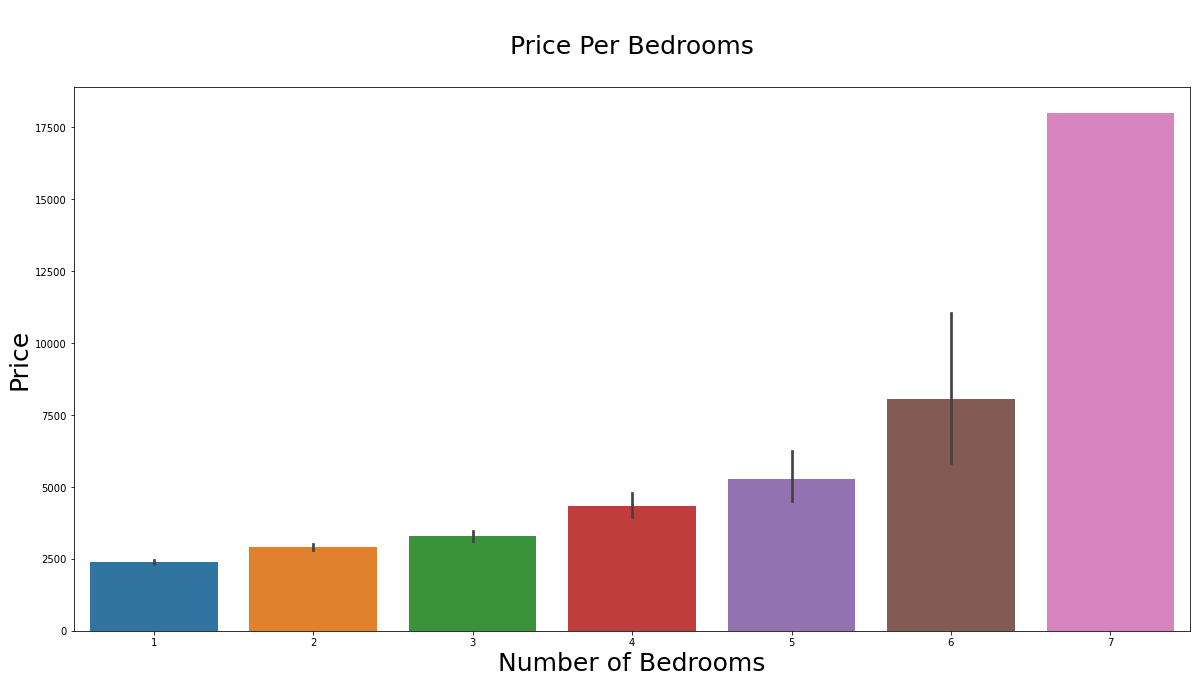

In [52]:
plt.figure(figsize=(20,10))

sns.barplot(x='Bedrooms',y='Min Price',data=brooklyn_data)

plt.xlabel('Number of Bedrooms',fontsize=25)

plt.ylabel('Price',fontsize=25)

plt.title('\nPrice Per Bedrooms\n',fontsize=25)

plt.show()

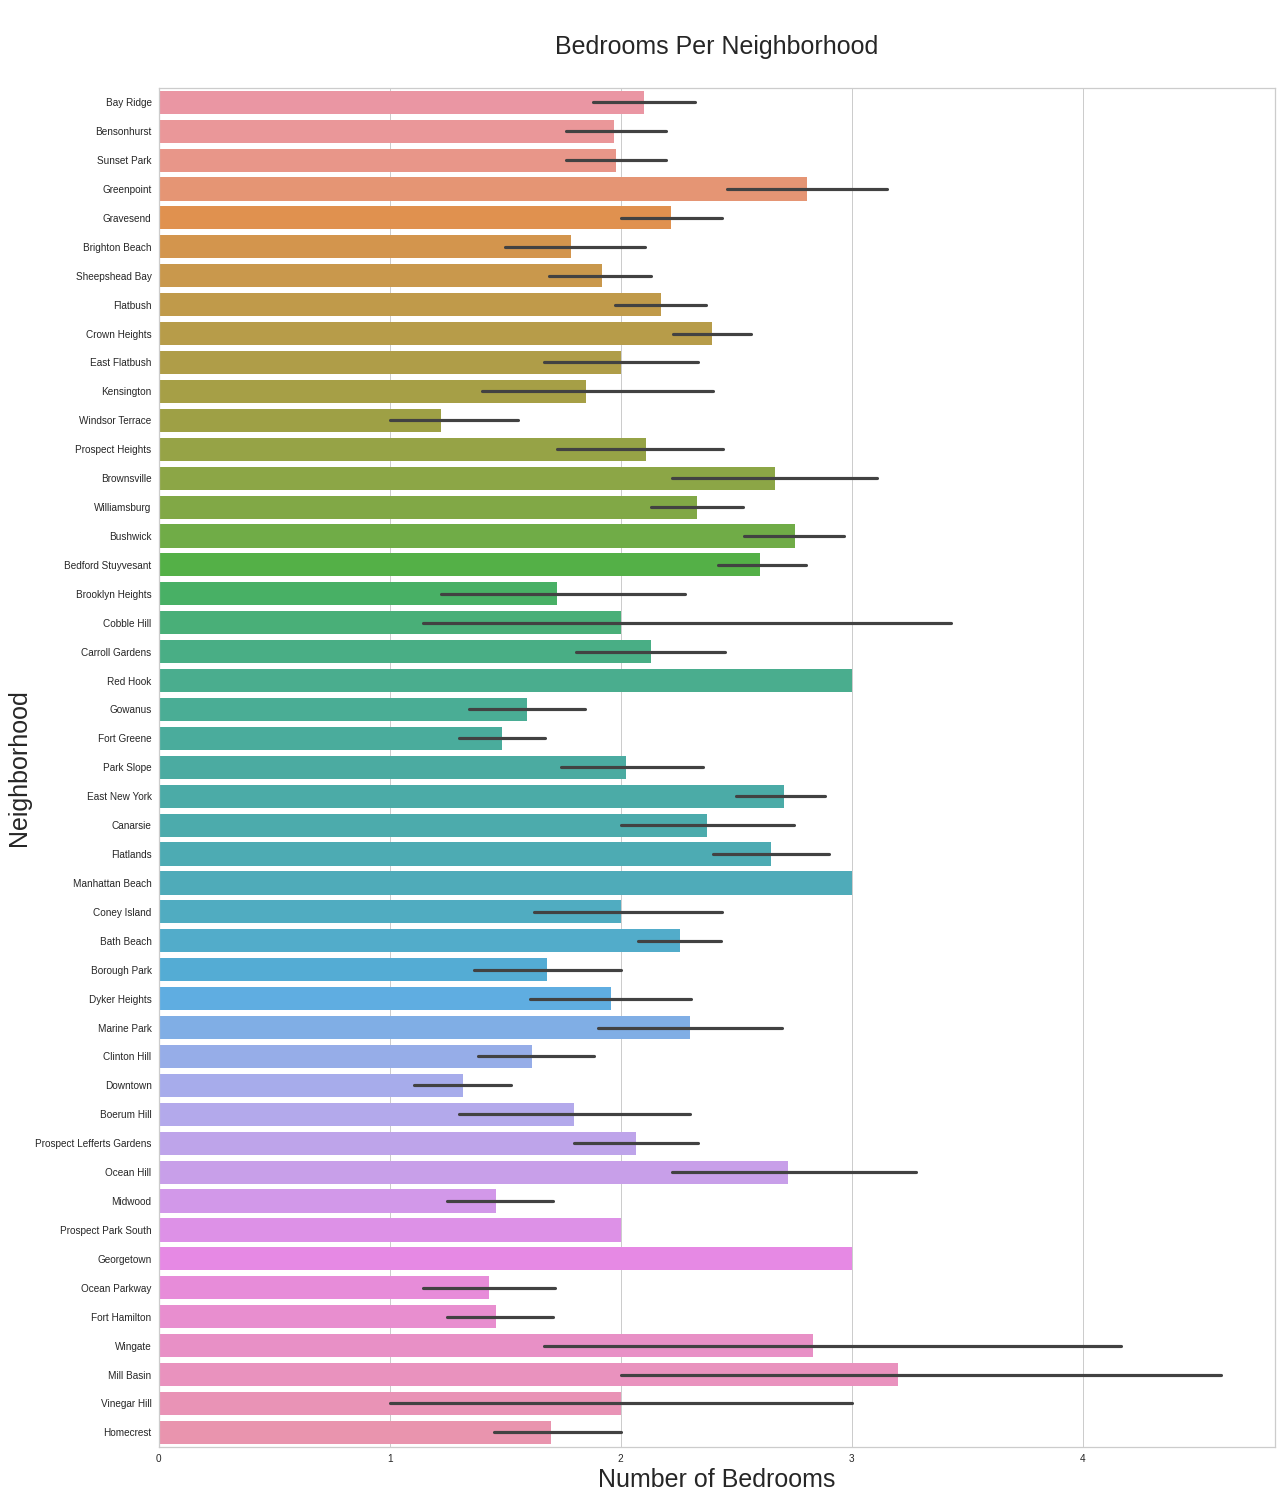

In [513]:
plt.figure(figsize=(20,25))

sns.barplot(x='Bedrooms',y='Neighborhood',data=brooklyn_data)

plt.xlabel('Number of Bedrooms',fontsize=25)

plt.ylabel('Neighborhood',fontsize=25)

plt.title('\nBedrooms Per Neighborhood\n',fontsize=25)

plt.show()

In [515]:
# Creating range columns for price

price_range = np.where((brooklyn_data['Min Price']<=1000),'<=1000',np.where((brooklyn_data['Min Price']>1000) & (brooklyn_data['Min Price']<=2500),'1000-2500',np.where((brooklyn_data['Min Price']>2500) & (brooklyn_data['Min Price']<=4000),'2500-4000',np.where((brooklyn_data['Min Price']>4000) & (brooklyn_data['Min Price']<=5500),'4000-5500',np.where((brooklyn_data['Min Price']>5500) & (brooklyn_data['Min Price']<=7500),'5500-7500',np.where((brooklyn_data['Min Price']>7500) & (brooklyn_data['Min Price']<=9500),'7500-9500',np.where((brooklyn_data['Min Price']>9500) & (brooklyn_data['Min Price']<=11000),'9500-11000',np.where((brooklyn_data['Min Price']>11000),'>11000','<>'))))))))

brooklyn_data_copy = brooklyn_data.copy()

brooklyn_data_copy['Price Range'] = price_range

brooklyn_data_copy['New'] = 1

brooklyn_data_copy.head(3)

,Borough,Neighborhood,Latitude,Longitude,Bedrooms,Bathrooms,Size,Street Address,Min Price,Max Price,Price Range,New
0,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,750.0,571 82nd St #3R,1775,1775,1000-2500,1
1,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,700.0,7913 3rd Ave #1,1825,1825,1000-2500,1
2,Brooklyn,Bay Ridge,40.625801,-74.030621,1,1.0,570.0,8201 4th Ave #1C,1500,1500,1000-2500,1


In [55]:
pivot_data = brooklyn_data_copy.pivot_table(index='Neighborhood',columns='Price Range',values='New',aggfunc='count',fill_value=0)

pivot_data.reset_index(inplace=True)

pivot_data.head()

Price Range,Neighborhood,1000-2500,2500-4000,4000-5500,5500-7500,7500-9500,9500-11000,>11000
0,Bath Beach,36,3,0,0,0,0,0
1,Bay Ridge,35,12,3,0,0,0,0
2,Bedford Stuyvesant,77,60,22,5,0,0,2
3,Bensonhurst,59,8,0,0,0,0,0
4,Boerum Hill,6,2,1,1,0,0,0


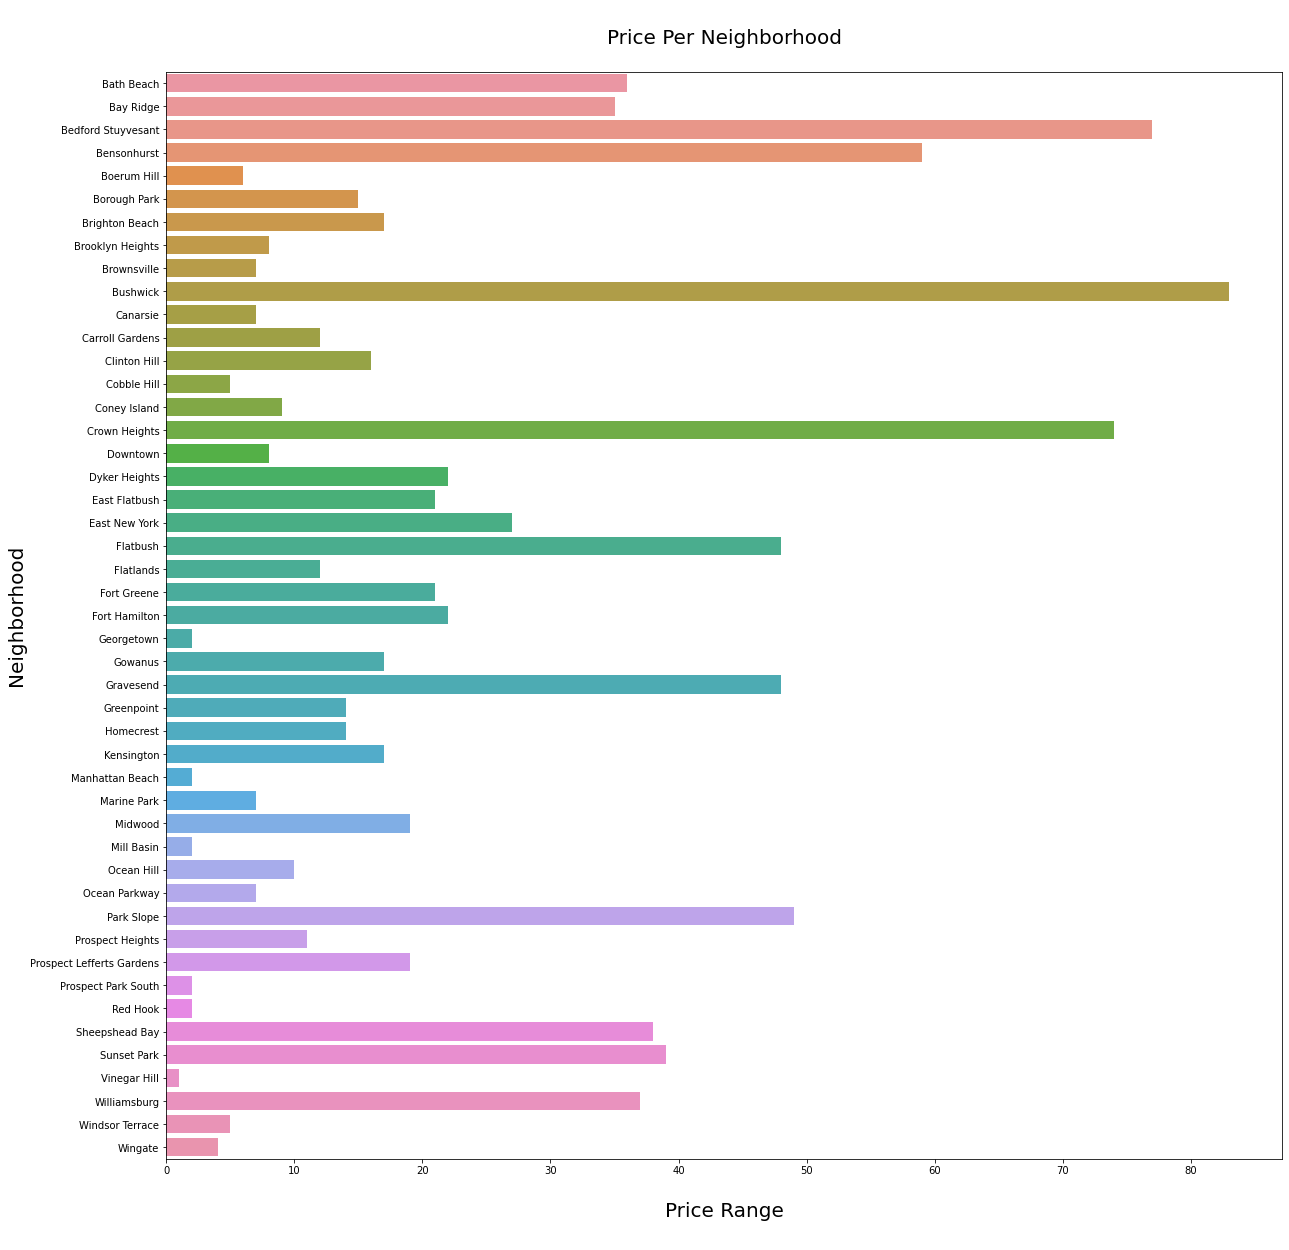

In [56]:
plt.figure(figsize=(20,20))

sns.barplot(x='1000-2500',y='Neighborhood',data=pivot_data)
sns.barplot(x='2500-4000',y='Neighborhood',data=pivot_data)
sns.barplot(x='4000-5500',y='Neighborhood',data=pivot_data)
sns.barplot(x='5500-7500',y='Neighborhood',data=pivot_data)
sns.barplot(x='7500-9500',y='Neighborhood',data=pivot_data)
sns.barplot(x='9500-11000',y='Neighborhood',data=pivot_data)
sns.barplot(x='>11000',y='Neighborhood',data=pivot_data)

plt.xlabel('\nPrice Range\n',fontsize=20)

plt.ylabel('Neighborhood',fontsize=20)

plt.title('\nPrice Per Neighborhood\n',fontsize=20)

plt.show()

In [58]:
# Creating range columns for size

size_range = np.where((brooklyn_data_copy['Size']<=500),'<=500',np.where((brooklyn_data_copy['Size']>500) & (brooklyn_data_copy['Size']<=1000),'500-1000',np.where((brooklyn_data_copy['Size']>1000) & (brooklyn_data_copy['Size']<=2000),'1000-2000',np.where((brooklyn_data_copy['Size']>2000) & (brooklyn_data_copy['Size']<=3000),'2000-3000',np.where((brooklyn_data_copy['Size']>3000) & (brooklyn_data_copy['Size']<=4000),'3000-4000',np.where((brooklyn_data_copy['Size']>4000) & (brooklyn_data_copy['Size']<=5000),'4000-5000',np.where((brooklyn_data_copy['Size']>5000) & (brooklyn_data_copy['Size']<=6000),'5000-6000',np.where(brooklyn_data_copy['Size']>6000,'>6000','<>'))))))))

brooklyn_data_copy['Size Range'] = size_range

brooklyn_data_copy.head()

,Borough,Neighborhood,Latitude,Longitude,Bedrooms,Bathrooms,Size,Street Address,Min Price,Max Price,Price Range,New,Size Range
0,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,750.0,571 82nd St #3R,1775,1775,1000-2500,1,500-1000
1,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,700.0,7913 3rd Ave #1,1825,1825,1000-2500,1,500-1000
2,Brooklyn,Bay Ridge,40.625801,-74.030621,1,1.0,570.0,8201 4th Ave #1C,1500,1500,1000-2500,1,500-1000
3,Brooklyn,Bay Ridge,40.625801,-74.030621,3,1.0,1000.0,405 78th St #4,2400,2400,1000-2500,1,500-1000
4,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,1100.0,8105 4th Ave #4H,2350,2350,1000-2500,1,1000-2000


In [59]:
size_pivot = brooklyn_data_copy.pivot_table(index='Neighborhood',columns='Size Range',values='New',aggfunc='count',fill_value=0)

size_pivot.reset_index(inplace=True)

size_pivot.head()

Size Range,Neighborhood,1000-2000,2000-3000,3000-4000,4000-5000,500-1000,5000-6000,<=500,>6000
0,Bath Beach,15,0,1,0,23,0,0,0
1,Bay Ridge,11,3,0,0,35,0,0,1
2,Bedford Stuyvesant,64,3,8,0,85,0,6,0
3,Bensonhurst,10,0,2,0,52,0,3,0
4,Boerum Hill,3,0,0,0,6,0,1,0


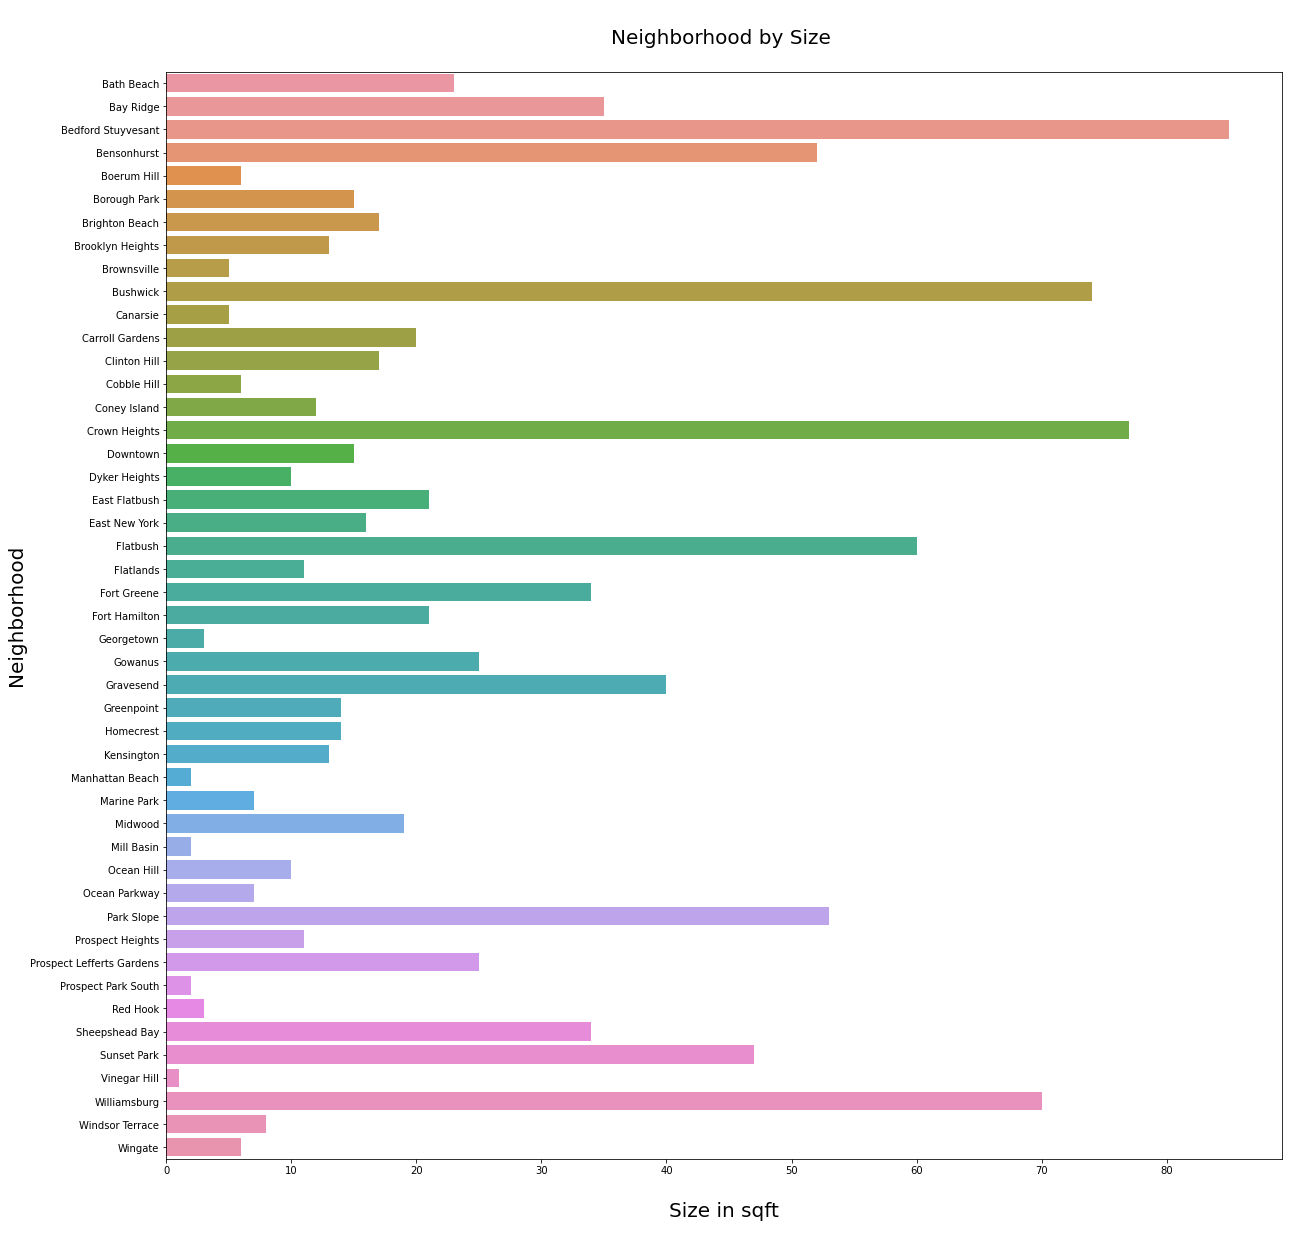

In [60]:
plt.figure(figsize=(20,20))

sns.barplot(x='1000-2000',y='Neighborhood',data=size_pivot)
sns.barplot(x='2000-3000',y='Neighborhood',data=size_pivot)
sns.barplot(x='3000-4000',y='Neighborhood',data=size_pivot)
sns.barplot(x='4000-5000',y='Neighborhood',data=size_pivot)
sns.barplot(x='500-1000',y='Neighborhood',data=size_pivot)
sns.barplot(x='5000-6000',y='Neighborhood',data=size_pivot)
sns.barplot(x='<=500',y='Neighborhood',data=size_pivot)
sns.barplot(x='>6000',y='Neighborhood',data=size_pivot)

plt.xlabel('\nSize in sqft\n',fontsize=20)

plt.ylabel('Neighborhood',fontsize=20)

plt.title('\nNeighborhood by Size \n',fontsize=20)

plt.show()

### Now its time to display all the neighborhoods on the Brooklyn map using folium

In [61]:
# Create Brooklyn Map

ny_addr = 'New York City, NY'

locator = Nominatim(user_agent='ny_agent')

location = locator.geocode(ny_addr)

ny_lat = location.latitude

ny_lng = location.longitude

print('So the coordinates for New York City are : {} latitude and {} longitude'.format(ny_lat,ny_lng))

So the coordinates for New York City are : 40.7127281 latitude and -74.0060152 longitude


In [62]:
ny_map = folium.Map([ny_lat,ny_lng],zoom_start=10)

ny_map

In [63]:
# Now lets visualize the Brooklyn Neighborhoods on the New York City map

for neighbor, neighbhor_lat, neighbhor_lng in zip(brooklyn_data_copy['Neighborhood'],brooklyn_data_copy['Latitude'],brooklyn_data_copy['Longitude']):
    
    folium.CircleMarker(location = [neighbhor_lat,neighbhor_lng],radius=5,popup=neighbor,color='blue',fill_color='blue',fill=True,fill_opacity=0.7).add_to(ny_map)

ny_map

In [58]:
print('\n\nNow its time to explore the venues with all the {} unique neighborhoods out of {} rows of neighborhoods in the brooklyn_data dataframe using Foursquare API.\n\n'.format(len(np.unique(brooklyn_data['Neighborhood'])),brooklyn_data.shape[0]))



Now its time to explore the venues with all the 47 unique neighborhoods out of 4091 rows of neighborhoods in the brooklyn_data dataframe using Foursquare API.




In [59]:
print('\n\nLet's define credentials to access Foursquare API\n\n')



Lets define credentials to access Foursquare API




In [79]:
# Foursquare Credentials

# Client Id
cid = 'NDQZJQDCH4L15AUMHBK3B5K0SBB1BNOLTATIKIVDGKNCRPGH'

# Client Secret
csec = 'LSVQMQXR1MEI012HPSEUC4K4UP5XIRIHZXEWXEDMIZFKXI3G'

# Foursquate API version
ver = '20180605'


In [64]:
brooklyn = brooklyn_data_copy.groupby(['Neighborhood','Latitude','Longitude'])['Neighborhood'].count().to_frame()

brooklyn.columns = ['Count']

brooklyn.reset_index(inplace=True)

brooklyn

,Neighborhood,Latitude,Longitude,Count
0,Bath Beach,40.599519,-73.998752,39
1,Bay Ridge,40.625801,-74.030621,50
2,Bedford Stuyvesant,40.687232,-73.941785,166
3,Bensonhurst,40.611009,-73.995180,67
4,Boerum Hill,40.687241,-73.983577,10
5,Borough Park,40.633131,-73.990498,22
6,Brighton Beach,40.576825,-73.965094,28
7,Brooklyn Heights,40.695864,-73.993782,18
8,Brownsville,40.663950,-73.910235,9
9,Bushwick,40.698116,-73.925258,127


In [81]:
# Setting api data retuen limit to 100 venues within the radius of 500 meters

lim = 100

def getVenuesData(names,latitudes,longitudes,radius=500):
    
    venues_data = []
    
    for name,lat,lng in zip(names,latitudes,longitudes):
        
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(cid,csec,ver,lat,lng,radius,lim)

        response = requests.get(url)
        
        result = response.json()
        
        results = result['response']['groups'][0]['items']
        
        venues_data.append([(name,
                             lat,
                             lng,
                             venues['venue']['name'],
                             venues['venue']['location']['lat'],
                             venues['venue']['location']['lng'],
                             venues['venue']['categories'][0]['name'],
                            ) for venues in results])
        
    venues_df = pd.DataFrame([data for venue_data in venues_data for data in venue_data])
    
    venues_df.columns =['Neighborhood','Latitude','Longitude','Venue Name','Venue Latitude','Venue Longitude','Category']
    
    return (venues_df)

venues_df = getVenuesData(names=brooklyn['Neighborhood'],latitudes=brooklyn['Latitude'],longitudes=brooklyn['Longitude'])

# Let's save venue dataframe

venues_df.to_csv('venues_dataframe.csv',index=None)

In [83]:
print('\n\nSo we have total {} unique venues in this venues dataframe\n\n'.format(len(np.unique(venues_df['Venue Name']))))



So we have total 1694 unique venues in this venues dataframe




In [65]:
# Read the venues (paces-of-interest) data file from previous step
venues_dataframe = pd.read_csv('venues_dataframe.csv')

venues_df = (venues_dataframe[venues_dataframe['Category']!='Neighborhood']).reset_index(drop=True)

venues_df.head()

,Neighborhood,Latitude,Longitude,Venue Name,Venue Latitude,Venue Longitude,Category
0,Bath Beach,40.599519,-73.998752,Bensonhurst Park,40.597065,-73.998340,Park
1,Bath Beach,40.599519,-73.998752,Bay Parkway Water Front,40.595941,-74.000917,Surf Spot
2,Bath Beach,40.599519,-73.998752,Five Guys,40.595236,-74.000225,Burger Joint
3,Bath Beach,40.599519,-73.998752,Carvel,40.598733,-73.997670,Ice Cream Shop
4,Bath Beach,40.599519,-73.998752,Pino's Ristorante,40.600955,-74.000806,Italian Restaurant


In [66]:
# Summarizing the venues data by neighborhood and category to get the count of venues
venue_groupedBy = venues_df.groupby(['Neighborhood','Category']).agg({'Category':'count'})

venue_groupedBy.columns = ['Category Count']

venue_groupedBy.reset_index(inplace=True)

venue_groupedBy.columns = ['Neighborhood','Category','Category Count']


venue_groupedBy.head()

,Neighborhood,Category,Category Count
0,Bath Beach,Asian Restaurant,1
1,Bath Beach,Bakery,1
2,Bath Beach,Bank,1
3,Bath Beach,Bubble Tea Shop,3
4,Bath Beach,Burger Joint,1


In [67]:
# Pivot the summarized venues data
venue_pivot = venue_groupedBy.pivot_table(index='Neighborhood',columns='Category',values='Category Count',aggfunc='sum',fill_value=0)
venue_pivot.index.name = None
venue_pivot.reset_index(inplace=True)
venue_pivot.rename(columns={'index':'Neighborhood'},inplace=True)
venue_pivot.head()

Category,Neighborhood,ATM,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,...,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio
0,Bath Beach,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Bay Ridge,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,Bedford Stuyvesant,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3,Bensonhurst,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Boerum Hill,0,0,0,0,1,0,0,0,2,0,0,0,0,1,2,6,0,0,0,0,1,0,0,1,...,0,0,0,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2


In [68]:
# Merger (join) properties data with the summarized venues data - to get the count of each venue category 
# (place-of-interest) per property

pivot_merge = pd.merge(brooklyn_data,venue_pivot,on='Neighborhood',how='left')

print(pivot_merge.shape,'\n')
pivot_merge.head(3)

(1629, 270) 



,Borough,Neighborhood,Latitude,Longitude,Bedrooms,Bathrooms,Size,Street Address,Min Price,Max Price,ATM,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,...,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio
0,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,750.0,571 82nd St #3R,1775,1775,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,Brooklyn,Bay Ridge,40.625801,-74.030621,2,1.0,700.0,7913 3rd Ave #1,1825,1825,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,Brooklyn,Bay Ridge,40.625801,-74.030621,1,1.0,570.0,8201 4th Ave #1C,1500,1500,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [371]:
len(pivot_merge)

1629

In [398]:
# drop irrelevant columns
dfForClustering = pivot_merge.drop(['Borough','Neighborhood','Latitude','Longitude','Street Address'],axis=1)
print(dfForClustering.shape)
dfForClustering.head()

(1629, 265)


,Bedrooms,Bathrooms,Size,Min Price,Max Price,ATM,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,...,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio
0,2,1.0,750.0,1775,1775,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,2,1.0,700.0,1825,1825,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,1,1.0,570.0,1500,1500,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,3,1.0,1000.0,2400,2400,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,2,1.0,1100.0,2350,2350,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


As the project will be used to address specific property needs/ preferences of an individual, end user will need to apply some flilters on the data to remove noise. One such example can be (implemented here):
<br><br>
**Preferences:**
1. At east 3 bedrooms
2. Property price <=USD 600


In [399]:
# Eliminating noise (unnecessary data) by filtering it out
dfForClustering = dfForClustering[(dfForClustering['Bedrooms']>=3) & (dfForClustering['Max Price']<=6000)]
dfForClustering.shape

(537, 265)

# Clustering

1. Till this step, we have combined the rental properties data with places-of-interest data and eliminaed noise as well from the combind data

2. To find the properties suiting the needs and preferences of the individual, we will use k-Means clustering algorithm
 
3. What is "k-Means" algorithm: This algorithm helps in grouping similar observations (based on their feaures) into a clusters. All observations in a single cluster have similar features. he number of clusters is provided by the end-user. "k" in k-means is the numer of clusters to be created 

4. This will group the properties based on their features and places-of-interest into different segments (clusters) and help us in further narrowing down to a set of prperties in the neighborhood

In [401]:
nCluster = 3

kmeans = KMeans(n_clusters=nCluster,random_state=0)

kmeans.fit(dfForClustering)

KMeans(n_clusters=3, random_state=0)

In [402]:
# Assigning cluster labels to the individual observation to indicate the cluster name for eah property in base data
label = kmeans.labels_
print(np.unique(label),'\n')
print(label[:15])

[0 1 2] 

[0 0 0 1 1 0 0 0 0 0 0 0 1 0 0]


In [403]:
dfForClustering['Cluster'] = label

dfForClustering.head(3)

,Bedrooms,Bathrooms,Size,Min Price,Max Price,ATM,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,...,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio,Cluster
3,3,1.0,1000.0,2400,2400,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
6,3,1.0,1000.0,2200,2200,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
8,3,1.0,1000.0,2200,2200,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [404]:
# Moving the cluster label column to the first position in the dataframe
columns = [dfForClustering.columns[-1]] + (dfForClustering.columns[:-1]).tolist()

dfForClustering = dfForClustering[columns]

dfForClustering.head(3)

,Cluster,Bedrooms,Bathrooms,Size,Min Price,Max Price,ATM,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,...,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio
3,0,3,1.0,1000.0,2400,2400,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
6,0,3,1.0,1000.0,2200,2200,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
8,0,3,1.0,1000.0,2200,2200,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,...,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [522]:
# Add back the categorical property features like lat, lon and address to the base data

dfForClustering = dfForClustering.join(pivot_merge[['Borough','Neighborhood','Latitude','Longitude','Street Address']])

In [406]:
# Selecting few venues ('places=of-interest') and rolling-up teh data at cluster level to 
# get the cluster level holistic view

clustered_data = dfForClustering.groupby('Cluster').agg({
                                        'Bedrooms':'count',
                                        'Max Price':'max',
                                       'Size':'max',
                                       'ATM':'max',
                                        'Asian Restaurant':'max',
                                       'Waterfront':'max',
                                       'Burger Joint':'max',
                                       'Shopping Mall':'max',
                                        'Bistro':'max',
                                        'Convenience Store':'max',
                                        'Farmers Market':'max',
                                        'Pharmacy':'max',
                                        'Art Museum' : 'max',
                                        'Athletics & Sports' : 'max',
                                        'Church' : 'max',
                                        'Cycle Studio' : 'max',
                                        'Dog Run' : 'max',
                                        'Garden Center' : 'max',
                                        'Outdoor Gym' : 'max',
                                        'Outdoors & Recreation' : 'max',
                                        'Pet Service' : 'max',
                                        'Metro Station':'max',
                                        'Beach':'max'
                                        })
clustered_data.reset_index(inplace=True)
clustered_data.rename(columns = {'Bedrooms' : 'cnt_Property',
                                'Min Price' : 'avg_Price',
                                'Size' : 'avg_Size'},inplace=True)
clustered_data.head(3)
# clustered_data.shape

,Cluster,cnt_Property,Max Price,avg_Size,ATM,Asian Restaurant,Waterfront,Burger Joint,Shopping Mall,Bistro,Convenience Store,Farmers Market,Pharmacy,Art Museum,Athletics & Sports,Church,Cycle Studio,Dog Run,Garden Center,Outdoor Gym,Outdoors & Recreation,Pet Service,Metro Station,Beach
0,0,333,3200,5000.0,1,1,0,1,1,0,1,1,3,1,1,1,0,1,2,0,1,1,1,2
1,1,62,6000,4000.0,0,2,0,3,0,1,1,1,2,1,1,1,1,1,2,0,1,1,0,1
2,2,142,4500,4680.0,0,1,0,3,1,0,1,1,2,1,0,1,0,1,2,0,0,1,1,2


In [407]:
# renaming columns

clustered_data.columns = ['Cluster','cnt_Property','avg_Price','avg_Size',
                            'cnt_ATM','cnt_Asian_Retauraunt','cnt_Waterfront',
                            'cnt_Burger_Joint','cnt_Mall','cnt_Bistro','cnt_Convenience_Store',
                            'cnt_Farmers_Market',
                            'cnt_Pharmacy',
                            'cnt_Art_Museum', 'cnt_Athletics_&_Sports',
                            'cnt_Church',
                            'cnt_Cycle_Studio',
                            'cnt_Dog_Run',
                            'cnt_Garden_Center',
                            'cnt_Outdoor_Gym',
                            'cnt_Outdoors_&_Recreation',
                            'cnt_Pet_Service',
                            'cnt_Metro_Station',
                              'cnt_Beach'
                        ]

clustered_data

,Cluster,cnt_Property,avg_Price,avg_Size,cnt_ATM,cnt_Asian_Retauraunt,cnt_Waterfront,cnt_Burger_Joint,cnt_Mall,cnt_Bistro,cnt_Convenience_Store,cnt_Farmers_Market,cnt_Pharmacy,cnt_Art_Museum,cnt_Athletics_&_Sports,cnt_Church,cnt_Cycle_Studio,cnt_Dog_Run,cnt_Garden_Center,cnt_Outdoor_Gym,cnt_Outdoors_&_Recreation,cnt_Pet_Service,cnt_Metro_Station,cnt_Beach
0,0,333,3200,5000.0,1,1,0,1,1,0,1,1,3,1,1,1,0,1,2,0,1,1,1,2
1,1,62,6000,4000.0,0,2,0,3,0,1,1,1,2,1,1,1,1,1,2,0,1,1,0,1
2,2,142,4500,4680.0,0,1,0,3,1,0,1,1,2,1,0,1,0,1,2,0,0,1,1,2


# E. Visualizing the cluster level data

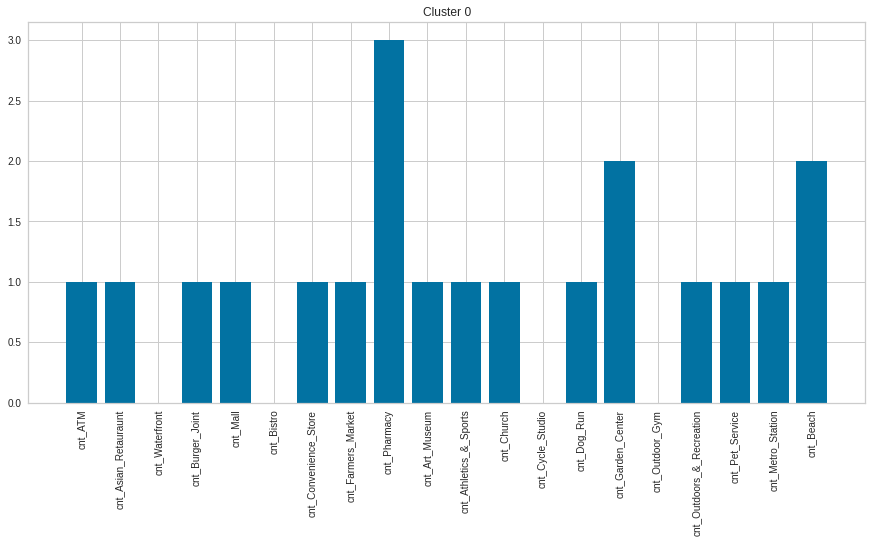

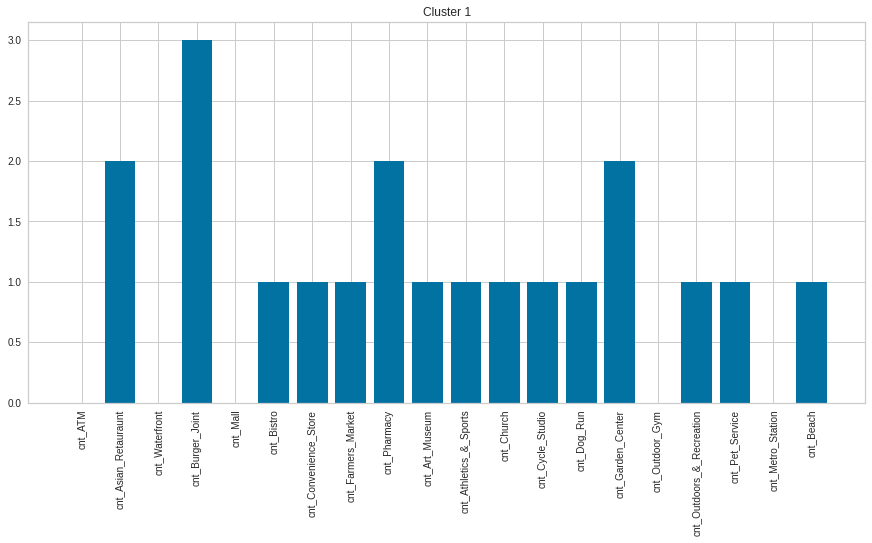

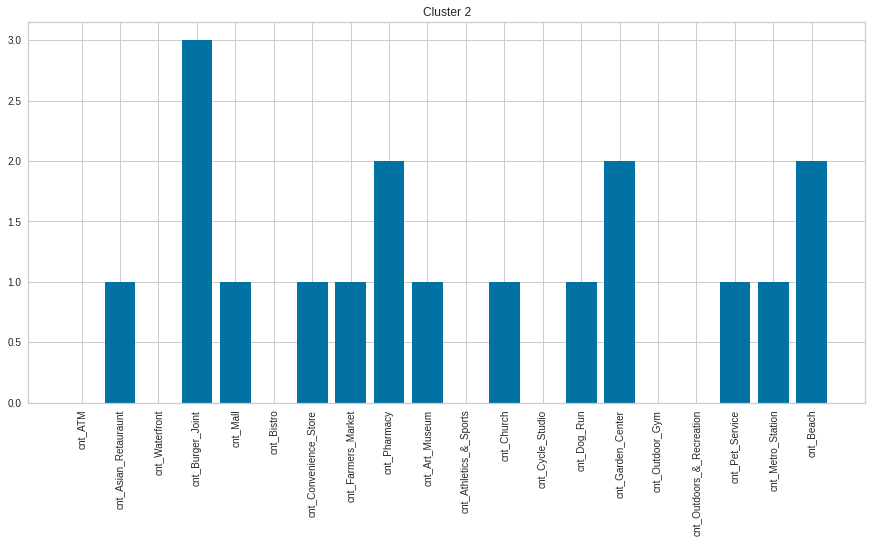

In [408]:
# Iteratign through all the clusters and dsplaying selected features (places-of-interest) on chart

for i in range(nCluster):

    # Cluster = 0
    df_Chart=clustered_data[clustered_data['Cluster']==i].T
    df_Chart.reset_index(inplace=True)
    df_Chart = df_Chart.iloc[1:,:]
    df_Chart.columns = ['Features','Values']
   
    plt.figure(figsize=(15,7))
    plt.bar(x='Features',height='Values',data=df_Chart.iloc[3:])
    plt.xticks(rotation=90)

    plt.title('Cluster {}'.format(i))
    plt.show()
    

## Key take-away from clustering exercise and comparing the clusters

Based on the clustering exercise, we are able to narrow down to the properties in **"Cluster 0"** because of the following reasons:

1. Close proximity to finacial services - **ATMs**
2. Quick access to daily need stores - **Convenience stores and Malls**
3. Good transporation connectivity - **Metro Station**
4. Fitness and Relaxation - **Oudoor and Recreational places**

In [410]:
dfForClustering.head(3)

,Cluster,Bedrooms,Bathrooms,Size,Min Price,Max Price,ATM,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,...,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio,Borough,Neighborhood,Latitude,Longitude,Street Address
3,0,3,1.0,1000.0,2400,2400,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,Brooklyn,Bay Ridge,40.625801,-74.030621,405 78th St #4
6,0,3,1.0,1000.0,2200,2200,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,Brooklyn,Bay Ridge,40.625801,-74.030621,446 Bay Ridge Ave #3
8,0,3,1.0,1000.0,2200,2200,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,Brooklyn,Bay Ridge,40.625801,-74.030621,446 Bay Ridge Ave #3


In [411]:
clustered_data.head(3)

,Cluster,cnt_Property,avg_Price,avg_Size,cnt_ATM,cnt_Asian_Retauraunt,cnt_Waterfront,cnt_Burger_Joint,cnt_Mall,cnt_Bistro,cnt_Convenience_Store,cnt_Farmers_Market,cnt_Pharmacy,cnt_Art_Museum,cnt_Athletics_&_Sports,cnt_Church,cnt_Cycle_Studio,cnt_Dog_Run,cnt_Garden_Center,cnt_Outdoor_Gym,cnt_Outdoors_&_Recreation,cnt_Pet_Service,cnt_Metro_Station,cnt_Beach
0,0,333,3200,5000.0,1,1,0,1,1,0,1,1,3,1,1,1,0,1,2,0,1,1,1,2
1,1,62,6000,4000.0,0,2,0,3,0,1,1,1,2,1,1,1,1,1,2,0,1,1,0,1
2,2,142,4500,4680.0,0,1,0,3,1,0,1,1,2,1,0,1,0,1,2,0,0,1,1,2


Now that we have found that the **Cluster 0** is the most suitable cluster, we will **compare the properties** in this cluster on the basis of their **price range, size range** and **number of bedroom**

In [413]:
# Filtering data for custer 0
dfForClustering_filter = dfForClustering[dfForClustering['Cluster']==0]
print(dfForClustering_filter.shape)
dfForClustering_filter.head(3)

(333, 271)


,Cluster,Bedrooms,Bathrooms,Size,Min Price,Max Price,ATM,Accessories Store,Airport Terminal,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,...,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio,Borough,Neighborhood,Latitude,Longitude,Street Address
3,0,3,1.0,1000.0,2400,2400,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,Brooklyn,Bay Ridge,40.625801,-74.030621,405 78th St #4
6,0,3,1.0,1000.0,2200,2200,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,Brooklyn,Bay Ridge,40.625801,-74.030621,446 Bay Ridge Ave #3
8,0,3,1.0,1000.0,2200,2200,0,0,0,3,0,0,0,0,0,0,0,0,3,0,0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,Brooklyn,Bay Ridge,40.625801,-74.030621,446 Bay Ridge Ave #3


## Data checks and exploration

In [415]:
print(dfForClustering_filter['Bedrooms'].min(), dfForClustering_filter['Bedrooms'].max())
print(dfForClustering_filter['Size'].min(), dfForClustering_filter['Size'].max())
print(dfForClustering_filter['Max Price'].min(), dfForClustering_filter['Max Price'].max())

3 4
650.0 5000.0
1800 3200


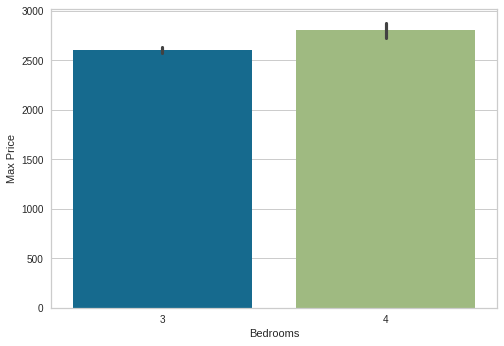

In [418]:
plt.figure()

sns.barplot(x='Bedrooms',y='Max Price',data=dfForClustering_filter)

#sns.barplot(x='Bedrooms',y='Max Price',data=dfForClustering_filter)

plt.show()

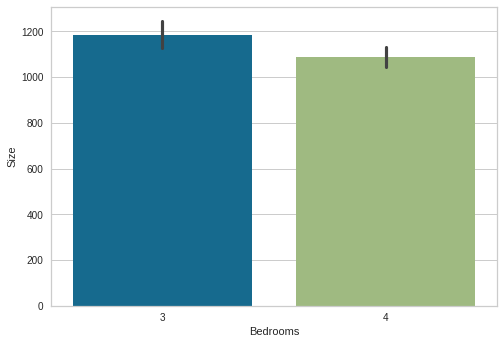

In [419]:
plt.figure()

sns.barplot(x='Bedrooms',y='Size',data=dfForClustering_filter)

#sns.barplot(x='Bedrooms',y='Max Price',data=dfForClustering_filter)

plt.show()

## Summarizing the data by max price, size and the number of bedrooms

In [524]:
housingOptions = dfForClustering_filter.groupby(['Max Price','Size','Bedrooms']).agg({'Cluster' : 'count'})

housingOptions.columns = ['Count Properties']

housingOptions.reset_index(inplace=True)

housingOptions

,Max Price,Size,Bedrooms,Count Properties
0,1800,2070.0,3,1
1,2000,800.0,3,2
2,2000,2320.0,3,1
3,2000,3025.0,3,1
4,2100,910.0,3,1
...,...,...,...,...
190,3200,750.0,4,2
191,3200,900.0,3,3
192,3200,950.0,3,2
193,3200,1000.0,3,2


## Creating price range, size range in the data

In [468]:
housingOptions['Size Range'] = np.where((housingOptions['Size']<=1000),'<=1000',np.where((housingOptions['Size']>1000) & (housingOptions['Size']<=2000),'1000-2000',np.where((housingOptions['Size']>2000),'>2000','<>')))

housingOptions

,Max Price,Size,Bedrooms,Count Properties,Size Range
0,1800,2070.0,3,1,>2000
1,2000,800.0,3,2,<=1000
2,2000,2320.0,3,1,>2000
3,2000,3025.0,3,1,>2000
4,2100,910.0,3,1,<=1000
...,...,...,...,...,...
190,3200,750.0,4,2,<=1000
191,3200,900.0,3,3,<=1000
192,3200,950.0,3,2,<=1000
193,3200,1000.0,3,2,<=1000


In [492]:
housingOptions['Price Range'] = np.where((housingOptions['Max Price']<=1500),'<=1500',np.where((housingOptions['Max Price']>1500) & (housingOptions['Max Price']<=2500),'1500-2500',np.where((housingOptions['Max Price']>2500),'>2500','<>')))

housingOptions

,Max Price,Size,Bedrooms,Count Properties,Size Range,Price Range
0,1800,2070.0,3,1,>2000,1500-2500
1,2000,800.0,3,2,<=1000,1500-2500
2,2000,2320.0,3,1,>2000,1500-2500
3,2000,3025.0,3,1,>2000,1500-2500
4,2100,910.0,3,1,<=1000,1500-2500
...,...,...,...,...,...,...
190,3200,750.0,4,2,<=1000,>2500
191,3200,900.0,3,3,<=1000,>2500
192,3200,950.0,3,2,<=1000,>2500
193,3200,1000.0,3,2,<=1000,>2500


## Summarizing the data by max price range, size range and the number of bedrooms

In [473]:
housingOptionsGroupby = housingOptions.groupby(['Bedrooms','Size Range','Price Range']).agg({'Count Properties':'sum'})

housingOptionsGroupby.columns = ['Sum']

housingOptionsGroupby.reset_index(inplace=True)

housingOptionsGroupby

,Bedrooms,Size Range,Price Range,Sum
0,3,1000-2000,1500-2500,58
1,3,1000-2000,>2500,75
2,3,<=1000,1500-2500,67
3,3,<=1000,>2500,72
4,3,>2000,1500-2500,10
5,3,>2000,>2500,6
6,4,1000-2000,1500-2500,6
7,4,1000-2000,>2500,19
8,4,<=1000,1500-2500,4
9,4,<=1000,>2500,16


In [483]:
# Transforming the data using pivot
housingOptionsPivot = housingOptionsGroupby.pivot_table(index=['Price Range','Size Range'],columns='Bedrooms',values='Sum',aggfunc='sum',fill_value=0)
housingOptionsPivot

Bedrooms                 3   4
Price Range Size Range        
1500-2500   1000-2000   58   6
            <=1000      67   4
            >2000       10   0
>2500       1000-2000   75  19
            <=1000      72  16
            >2000        6   0

In [488]:
# Data check
housingOptionsPivot[3].sum()+housingOptionsPivot[4].sum()

333

## Final summary table

In [484]:
housingOptionsPivot.reset_index(inplace=True)
housingOptionsPivot

Bedrooms,Price Range,Size Range,3,4
0,1500-2500,1000-2000,58,6
1,1500-2500,<=1000,67,4
2,1500-2500,>2000,10,0
3,>2500,1000-2000,75,19
4,>2500,<=1000,72,16
5,>2500,>2000,6,0


# F. Recommendations

Only look for properties in **Cluster 0** due to their close proximity to:
<br>

    1. shopping places
    2. metro
    3. financial services
    4. recreational activities

# G. Conclusions

1. Based on the properties in **Cluster 0**, we get properties in specific price and size range with 3 to 4 bedroms

2. These properties are in the **price range** of: **USD 1500-2000** and **USD 2500-3500**

3. In these price ranges, we have **options** for both both **3** and **4 bedroom properties**

4. Though the number of bedrooms differ in properties, but there are options within **same price range with different number of bedrooms**

5. These options can **help** the individual to easily **narrow down few proeprties as per their preferences/ constraints and prioritize visits** to these properties

# H. Refrences

#### https://foursquare.com/
#### http://python-visualization.github.io/folium/
#### https://geopy.readthedocs.io/en/stable/
#### https://seaborn.pydata.org/
#### https://beautiful-soup-4.readthedocs.io/en/latest/
#### https://www.scikit-yb.org/en/latest/api/cluster/elbow.html